# 2019-nCoV Data Analysis Logistic

## Logistic预测确诊人数

$P(t) = \frac{Ke^{r(t-t_0)}}{K+(e^{r(t-t_0)}-1)P_0}$
- $K$为环境最大容量
- $P_0$为初始容量
- $r$为增长率, $r=0$的时候, $P$不变

In [2]:
import pandas as pd

csv_file = "general-20200216.csv"
df = pd.read_csv(csv_file, encoding="utf-8")

[1.31284676e+03 2.09230335e+01 2.99134321e-01]


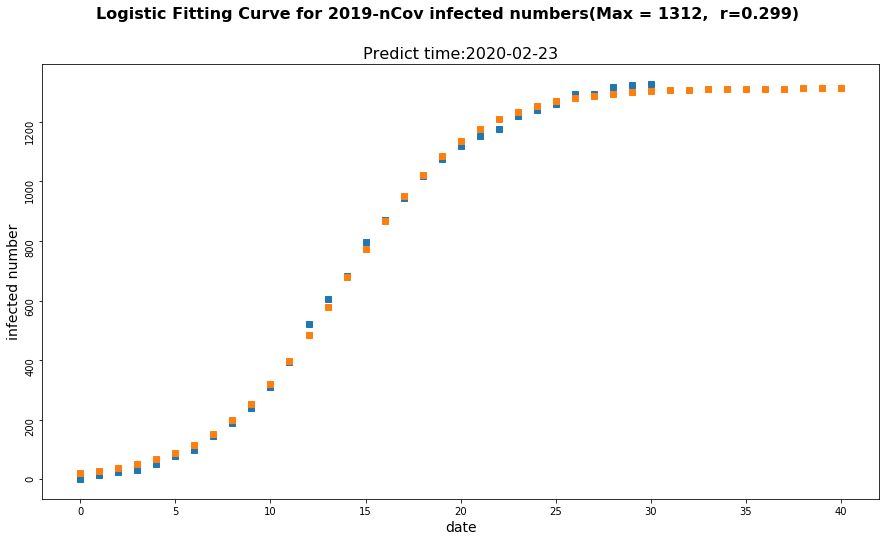

In [4]:
from scipy.optimize import curve_fit
import urllib
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

csv_file = "general-20200216.csv"
 
def logistic_function(t, K, P0, r):
    t0 = 0
    exp = np.exp(r * (t - t0))
    return (K * exp * P0) / (K + (exp - 1) * P0)
 
def predict(province_code):
    predict_days = 10 # 预测未来天数
    
    df = pd.read_csv(csv_file, encoding="utf-8")
    df = df[df.province_code == province_code]
    confirm = df['confirmed'].values
    x = np.arange(len(confirm))
 
    # 用最小二乘法估计拟合
    popt, pcov = curve_fit(logistic_function, x, confirm)
    print(popt)
 
    #近期情况预测
    predict_x = list(x) + [x[-1] + i for i in range(1, 1 + predict_days)]
    predict_x = np.array(predict_x)
    predict_y = logistic_function(predict_x, popt[0], popt[1], popt[2])
    
    #绘图
    plt.figure(figsize=(15, 8))
    plt.plot(x, confirm, 's',label="confimed infected number")
    plt.plot(predict_x, predict_y, 's',label="predicted infected number")
#     plt.xticks(predict_x, date_labels[:len(predict_x) + 1], rotation=90)
    plt.yticks(rotation=90)
 
    plt.suptitle("Logistic Fitting Curve for 2019-nCov infected numbers(Max = {},  r={:.3})".format(int(popt[0]), popt[2]), fontsize=16, fontweight="bold")
    plt.title("Predict time:{}".format(time.strftime("%Y-%m-%d", time.localtime())), fontsize=16)
    plt.xlabel('date', fontsize=14)
    plt.ylabel('infected number', fontsize=14)
    plt.plot()
    plt.show()
    
province_codes = [440000] 
for province_code in province_codes:
    predict(province_code)

### reference list
- https://zhuanlan.zhihu.com/p/106648847
- https://zhuanlan.zhihu.com/p/104268573
- https://blog.csdn.net/qq_26822029/article/details/104213781